In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path='/content/drive/MyDrive/NLP_ASSIGNMENTS/'
path=''

SETTING UP KEYWORDS

In [3]:
#set of covid related words. 

keywords=wo=['reported','droplet','infected','death','sanitizing','contagion','subtype','vaccination','severe']

In [4]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import networkx as nx
import matplotlib.pyplot as plt

fUNCTIONS TO GET SIMILAR WORDS

In [5]:
def compute_similar_words(model,source_word, topn=5):
    similar_words = [source_word]
    try:
        top_words = model.wv.most_similar(source_word,topn=topn)
        similar_words.extend([val[0] for val in top_words])
    except KeyError as err:
        print(err.args)
    return similar_words   

def compute_similar_words_document(model): #model - Word2vec model stored earlier 
    columns = ['word'+str(i-1) for i in range(1,7)]
    df = pd.DataFrame(data=None,columns=columns)
                                    # WE ARE GOING TO KEEP SIMILAR WORDS OF 3 LEVEL DEEP
    for source_word in keywords:
        similar_words = compute_similar_words(model,source_word)    #------DEPTH 1
        df.loc[len(df)] = similar_words
        
        for i in range(1,len(similar_words)):
            sec_similar_words = compute_similar_words(model,similar_words[i])   #----DEPTH 2
            df.loc[len(df)] = sec_similar_words

            for j in range(1,len(sec_similar_words)):
                third_similar_words=compute_similar_words(model,sec_similar_words[j])   #DEPTH 3
                df.loc[len(df)] = third_similar_words

   #Save similar words to a file. This file will be used to build the graph
    df.to_csv(path+'similar_words_assignment3.csv')


USING THE MODEL TRAINED IN ASSIGNMENT 2

In [6]:
model=Word2Vec.load(path+'trainedModel.bin')    #LOADING THE SAVED MODEL 
compute_similar_words_document(model)

In [7]:
words = pd.read_csv(path+'similar_words_assignment3.csv')
g = nx.cubical_graph()

#creating nodes and adding edges 

for i, row in words.iterrows():
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(2,len(row)):
        g.add_edge(row[1], row[j])    
      

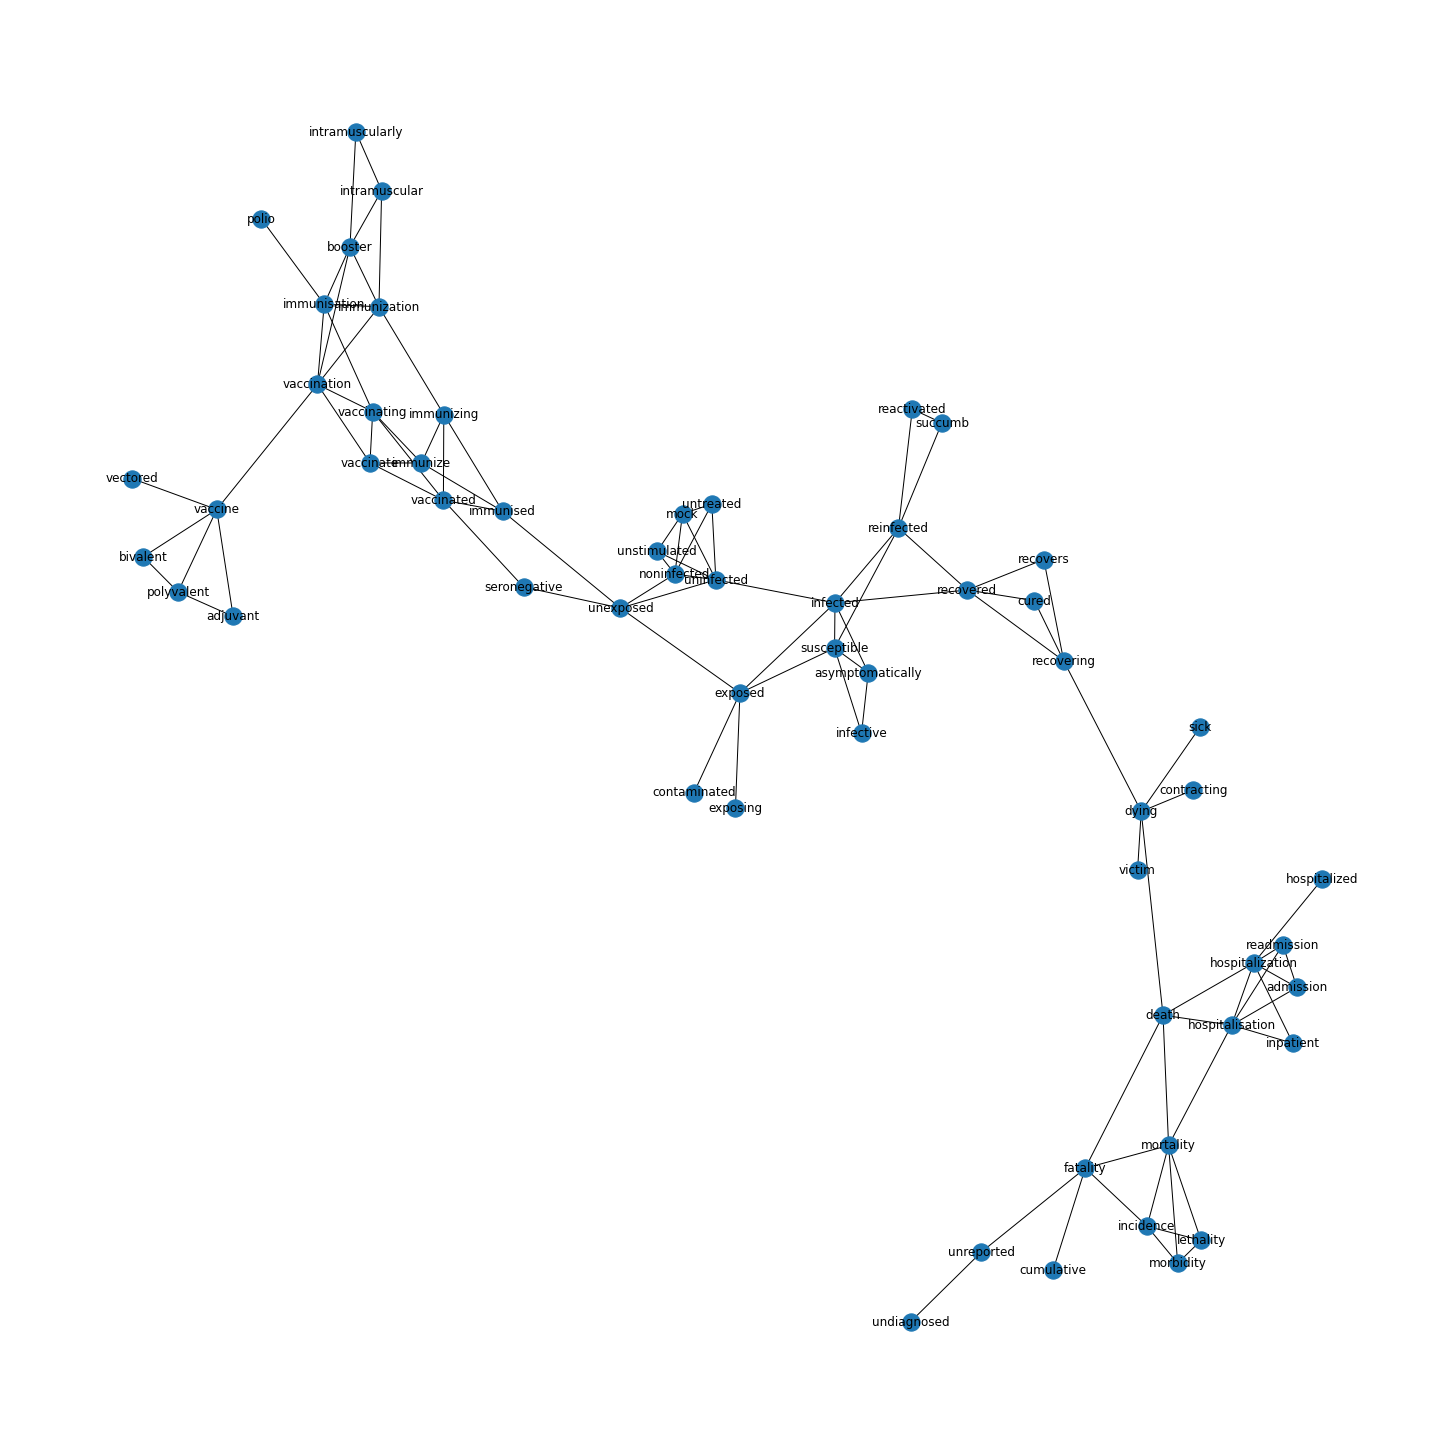

In [29]:
fedges = filter(lambda x: g.degree()[x[0]] > 1 and g.degree()[x[1]] > 2, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

#This is to show how well the keyword is connected with the other words in the corpus  
#change the keyword to obtain a different graph
#you do not need this while running the entire no

plt.rcParams['figure.figsize'] = [20, 20]

subgraph = nx.node_connected_component(f,'death')
nx.draw(g.subgraph(subgraph), with_labels=True)
plt.savefig("similarity_nodes.pdf")     #the graph is stored as pdf in this file
plt.show()
